In [2]:
import math

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
iris_df = pd.DataFrame(iris["data"], columns=iris["feature_names"])

In [5]:
iris_df["target"] = iris["target"]

In [6]:
distance = np.zeros(len(iris_df))
iris_df["distance"] = distance

In [7]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,distance
0,5.1,3.5,1.4,0.2,0,0.0
1,4.9,3.0,1.4,0.2,0,0.0
2,4.7,3.2,1.3,0.2,0,0.0
3,4.6,3.1,1.5,0.2,0,0.0
4,5.0,3.6,1.4,0.2,0,0.0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0.0
146,6.3,2.5,5.0,1.9,2,0.0
147,6.5,3.0,5.2,2.0,2,0.0
148,6.2,3.4,5.4,2.3,2,0.0


In [8]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(iris_df)

In [9]:
train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,distance
106,4.9,2.5,4.5,1.7,2,0.0
97,6.2,2.9,4.3,1.3,1,0.0
16,5.4,3.9,1.3,0.4,0,0.0
124,6.7,3.3,5.7,2.1,2,0.0
94,5.6,2.7,4.2,1.3,1,0.0
...,...,...,...,...,...,...
129,7.2,3.0,5.8,1.6,2,0.0
33,5.5,4.2,1.4,0.2,0,0.0
77,6.7,3.0,5.0,1.7,1,0.0
108,6.7,2.5,5.8,1.8,2,0.0


In [10]:
def euclidean_distance(x, train_points: pd.DataFrame):
    train_points_np = train_points.to_numpy()
    for i in range(len(train_points_np)):
        dist = np.sqrt(np.sum((train_points_np[i, :-2] - x[:-2]) ** 2))
    
        train_points_np[i, -1] = dist
    train_points_new = pd.DataFrame(train_points_np, columns=train_points.columns)
    return train_points_new

In [11]:
x = test.iloc[1, :]
x = x.to_numpy()
x

array([7.1, 3. , 5.9, 2.1, 2. , 0. ])

In [12]:
trained = euclidean_distance(x, train)
trained_k = trained.sort_values(by="distance", ascending=True).iloc[:5, :]
trained_k

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,distance
5,7.2,3.2,6.0,1.8,2.0,0.387298
100,6.9,3.2,5.7,2.3,2.0,0.400000
42,6.8,3.2,5.9,2.3,2.0,0.412311
63,7.4,2.8,6.1,1.9,2.0,0.458258
97,6.8,3.0,5.5,2.1,2.0,0.500000


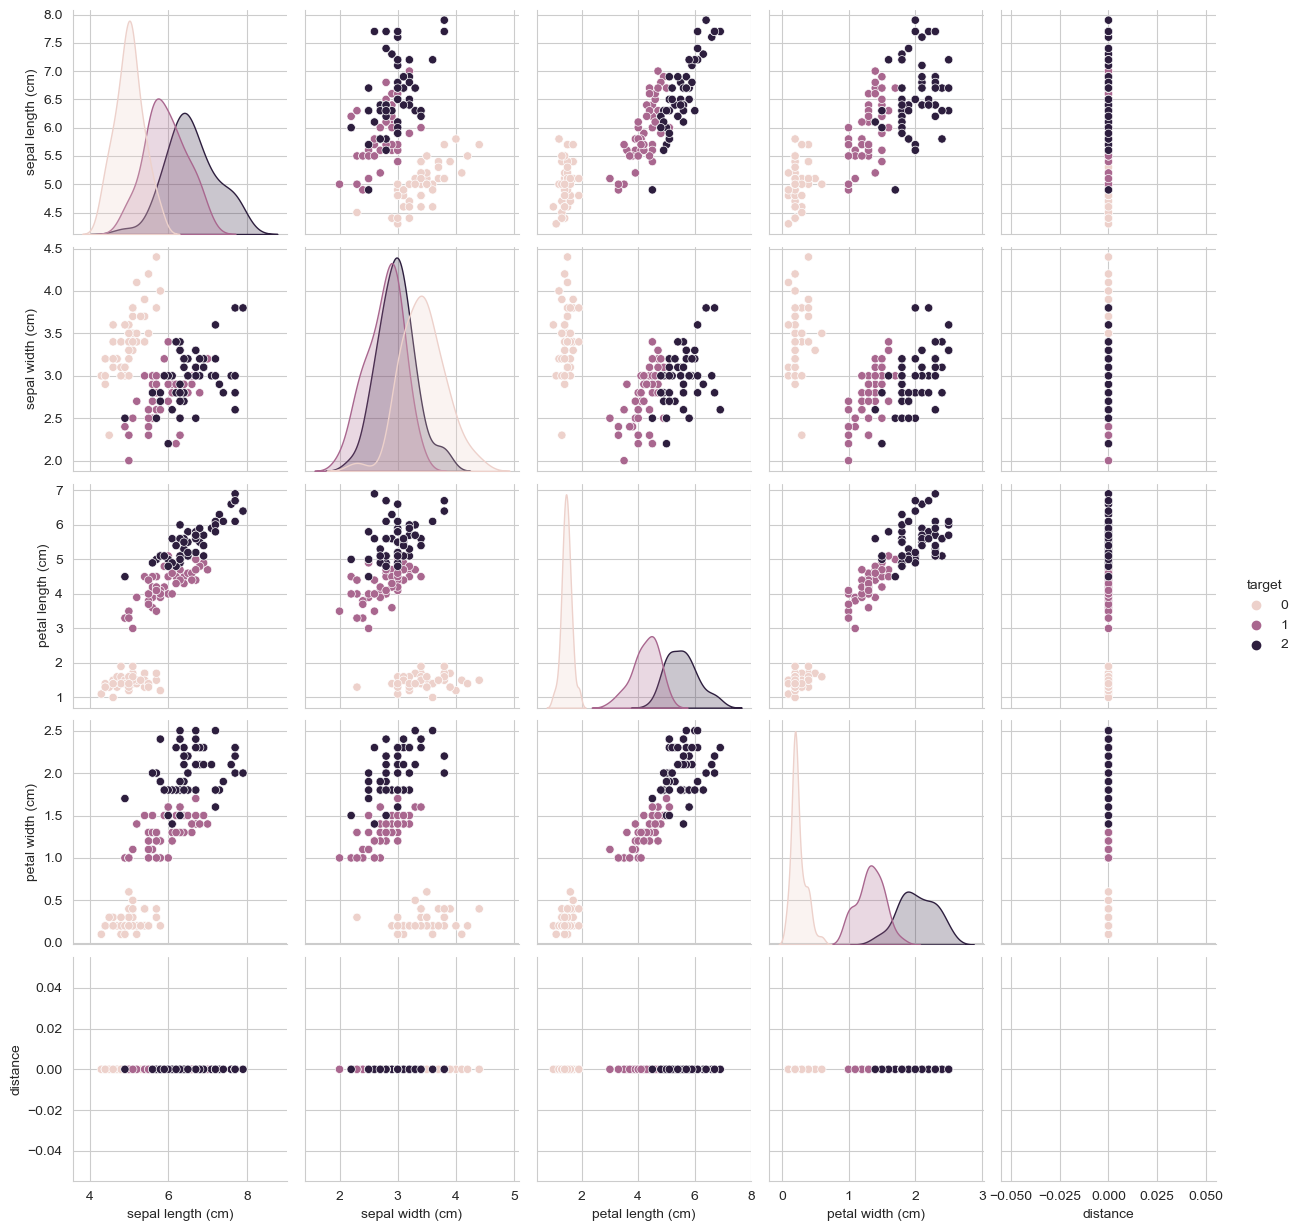

In [13]:
import seaborn as sns
sns.pairplot(data=iris_df, hue="target")
plt.show()